In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [2]:
df = pd.read_excel('../data/dataframe redes sociales.xlsx')
df.head(10)

,FotoFB,NombreFB,AmigosFB,PublicacionesFB,LikesFB,ComentariosFB,InformaciónFB,FotoTW,NombreTW,SeguidoresTW,SeguidosTW,PublicacionesTW,FotoINST,NombreINST,SeguidoresINST,SeguidosINST,PerfilINST,PublicacionesINST,LikesINST,ComentariosINST
0,NO,SI,95,400,17,9,SI,0,0,0,0,0,NO,SI,39,104,PRIVADO,0,0,0
1,SI,SI,241,498,41,14,SI,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NO,SI,96,0,0,0,NO,NO,SI,34,88,0,NO,SI,95,39,PÚBLICO,0,0,0
3,SI,SI,33,20,7,3,NO,0,0,0,0,0,0,0,0,0,0,0,0,0
4,SI,SI,100,45,14,5,SI,NO,SI,2,6,0,SI,SI,60,578,PRIVADO,0,0,0
5,SI,SI,222,130,36,12,SI,SI,SI,1,39,0,SI,SI,103,113,PRIVADO,27,13,3
6,SI,SI,126,0,0,0,NO,0,0,0,0,0,SI,NO,114,127,PRIVADO,5,15,4
7,SI,SI,61,52,12,5,SI,0,0,0,0,0,SI,SI,54,123,PRIVADO,5,6,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df.FotoFB = df.FotoFB.replace({"NO": 1, "SI":2})

In [4]:
df.NombreFB = df.NombreFB.replace({"NO": 1, "SI":2})

In [5]:
df.InformaciónFB = df.InformaciónFB.replace({"NO": 1, "SI":2})

In [6]:
df.FotoTW = df.FotoTW.replace({"NO": 1, "SI":2})

In [7]:
df.NombreTW = df.NombreTW.replace({"NO": 1, "SI":2})

In [8]:
df.FotoINST = df.FotoINST.replace({"NO": 1, "SI":2})

In [9]:
df.NombreINST = df.NombreINST.replace({"NO": 1, "SI":2})

In [10]:
df.PerfilINST = df.PerfilINST.replace({"PRIVADO": 1, "PÚBLICO":2})

In [11]:
df

,FotoFB,NombreFB,AmigosFB,PublicacionesFB,LikesFB,ComentariosFB,InformaciónFB,FotoTW,NombreTW,SeguidoresTW,SeguidosTW,PublicacionesTW,FotoINST,NombreINST,SeguidoresINST,SeguidosINST,PerfilINST,PublicacionesINST,LikesINST,ComentariosINST
0,1,2,95,400,17,9,2,0,0,0,0,0,1,2,39,104,1,0,0,0
1,2,2,241,498,41,14,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,96,0,0,0,1,1,2,34,88,0,1,2,95,39,2,0,0,0
3,2,2,33,20,7,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2,100,45,14,5,2,1,2,2,6,0,2,2,60,578,1,0,0,0
5,2,2,222,130,36,12,2,2,2,1,39,0,2,2,103,113,1,27,13,3
6,2,2,126,0,0,0,1,0,0,0,0,0,2,1,114,127,1,5,15,4
7,2,2,61,52,12,5,2,0,0,0,0,0,2,2,54,123,1,5,6,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


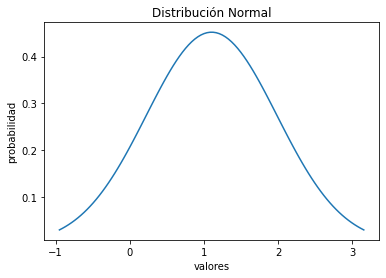

In [12]:
normal = stats.norm(np.mean(df["FotoFB"]), np.std(df["FotoFB"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

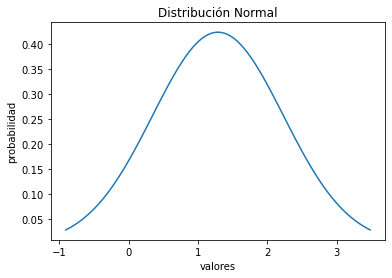

In [13]:
normal = stats.norm(np.mean(df["NombreFB"]), np.std(df["NombreFB"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x)
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

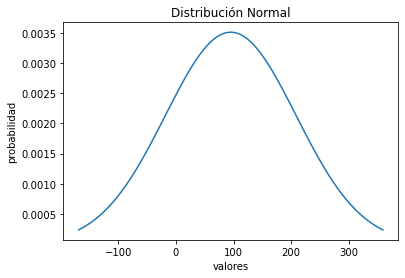

In [14]:
normal = stats.norm(np.mean(df["AmigosFB"]), np.std(df["AmigosFB"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

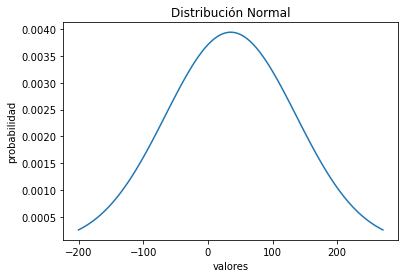

In [15]:
normal = stats.norm(np.mean(df["PublicacionesFB"]), np.std(df["PublicacionesFB"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

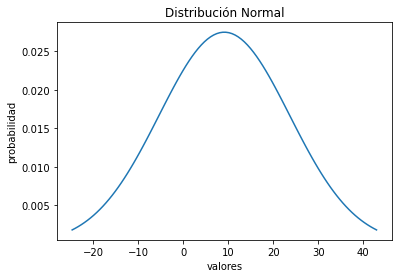

In [16]:
normal = stats.norm(np.mean(df["LikesFB"]), np.std(df["LikesFB"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

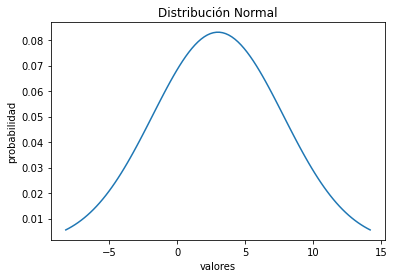

In [17]:
normal = stats.norm(np.mean(df["ComentariosFB"]), np.std(df["ComentariosFB"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

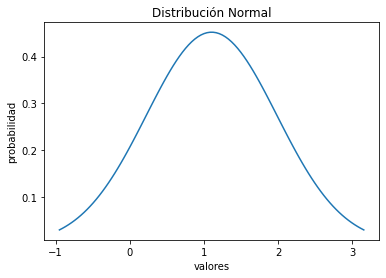

In [18]:
normal = stats.norm(np.mean(df["InformaciónFB"]), np.std(df["InformaciónFB"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

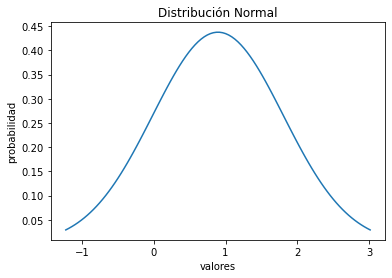

In [19]:
normal = stats.norm(np.mean(df["FotoTW"]), np.std(df["FotoTW"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

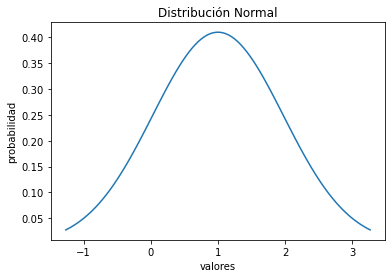

In [20]:
normal = stats.norm(np.mean(df["NombreTW"]), np.std(df["NombreTW"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

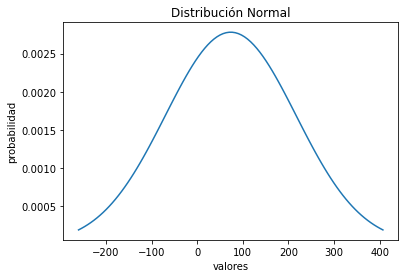

In [21]:
normal = stats.norm(np.mean(df["SeguidoresTW"]), np.std(df["SeguidoresTW"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

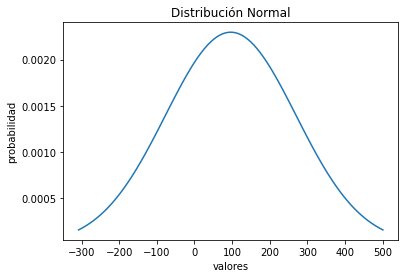

In [22]:
normal = stats.norm(np.mean(df["SeguidosTW"]), np.std(df["SeguidosTW"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

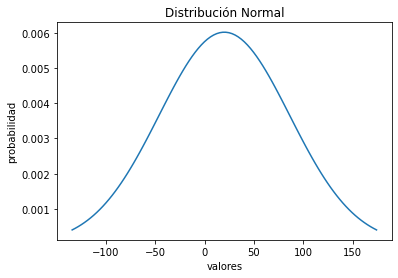

In [23]:
normal = stats.norm(np.mean(df["PublicacionesTW"]), np.std(df["PublicacionesTW"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

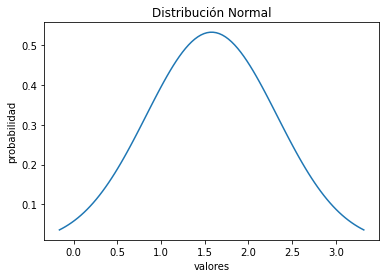

In [24]:
normal = stats.norm(np.mean(df["FotoINST"]), np.std(df["FotoINST"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

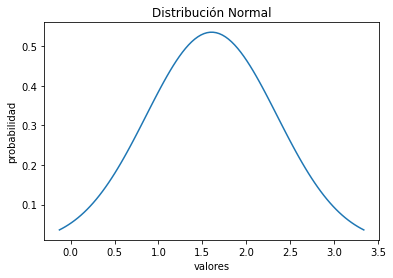

In [25]:
normal = stats.norm(np.mean(df["NombreINST"]), np.std(df["NombreINST"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

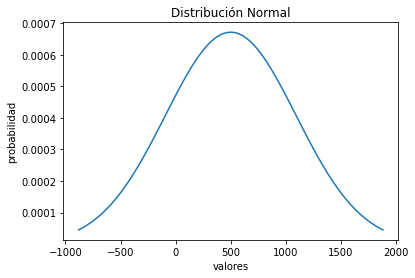

In [26]:
normal = stats.norm(np.mean(df["SeguidoresINST"]), np.std(df["SeguidoresINST"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

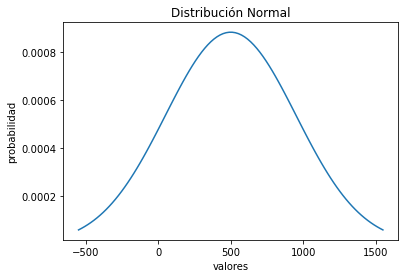

In [27]:
normal = stats.norm(np.mean(df["SeguidosINST"]), np.std(df["SeguidosINST"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

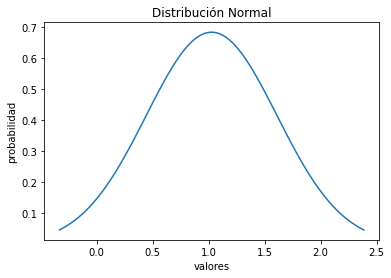

In [28]:
normal = stats.norm(np.mean(df["PerfilINST"]), np.std(df["PerfilINST"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

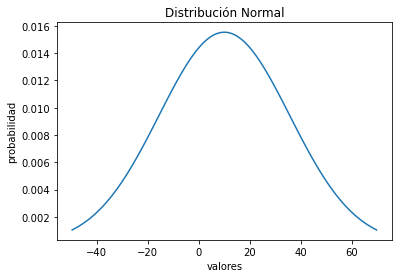

In [29]:
normal = stats.norm(np.mean(df["PublicacionesINST"]), np.std(df["PublicacionesINST"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

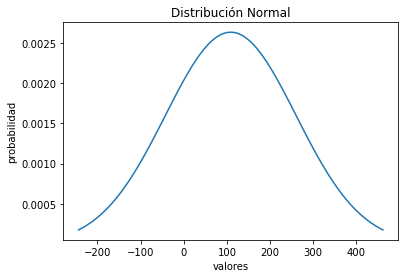

In [30]:
normal = stats.norm(np.mean(df["LikesINST"]), np.std(df["LikesINST"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

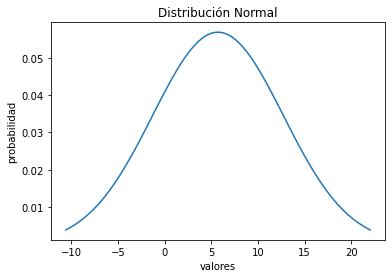

In [31]:
normal = stats.norm(np.mean(df["ComentariosINST"]), np.std(df["ComentariosINST"]))
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

In [32]:
df["Perfil_inversor"]=[1,1,1,0,1,2,1,1,0,0,0,2,1,1,1,0,1,2,1,0,2,1,0,1,1,1,1,0,1,1,1,1,1,1,2,2,2,1]

In [33]:
df.head()

,FotoFB,NombreFB,AmigosFB,PublicacionesFB,LikesFB,ComentariosFB,InformaciónFB,FotoTW,NombreTW,SeguidoresTW,...,PublicacionesTW,FotoINST,NombreINST,SeguidoresINST,SeguidosINST,PerfilINST,PublicacionesINST,LikesINST,ComentariosINST,Perfil_inversor
0,1,2,95,400,17,9,2,0,0,0,...,0,1,2,39,104,1,0,0,0,1
1,2,2,241,498,41,14,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,2,96,0,0,0,1,1,2,34,...,0,1,2,95,39,2,0,0,0,1
3,2,2,33,20,7,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,100,45,14,5,2,1,2,2,...,0,2,2,60,578,1,0,0,0,1


<AxesSubplot:title={'center':'Correlation Matrix'}>

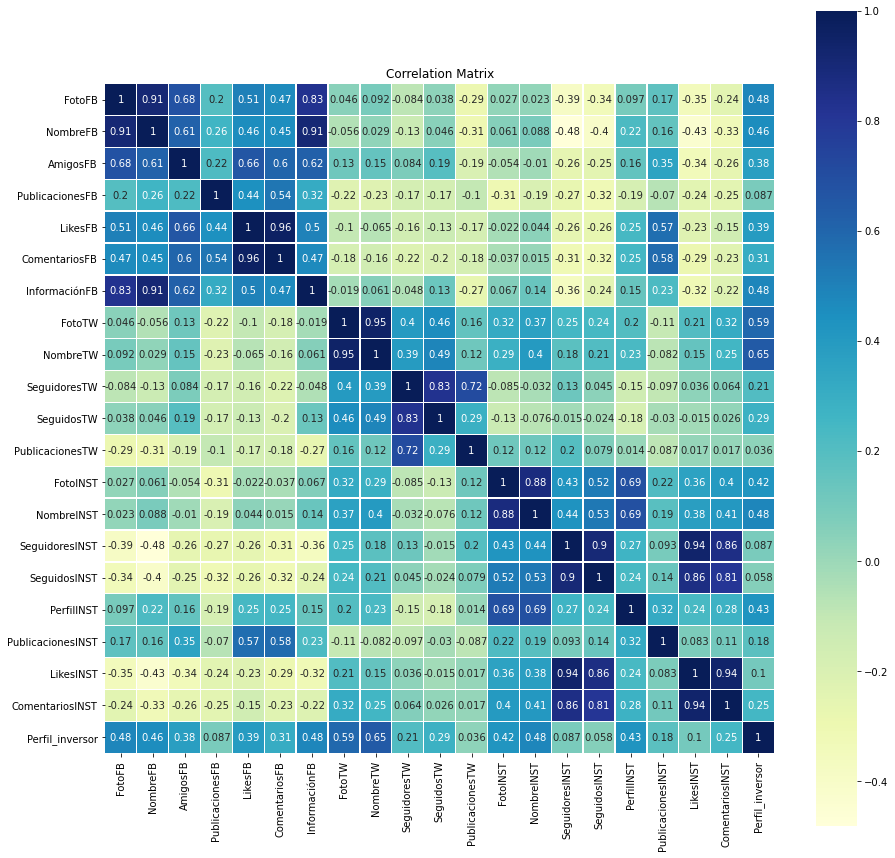

In [34]:
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='YlGnBu', linewidths=.3)

In [35]:
FEATS = ['FotoFB', 'NombreFB', 'AmigosFB', 'PublicacionesFB', 'LikesFB', 'ComentariosFB', 'InformaciónFB', 'FotoTW', 'NombreTW', 'SeguidoresTW', 'SeguidosTW', 'PublicacionesTW', 
         'FotoINST', 'NombreINST', 'SeguidoresINST', 'SeguidosINST', 'PerfilINST', 'PublicacionesINST','LikesINST', 'ComentariosINST']
TARGET = 'Perfil_inversor'

In [36]:
numeric_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                ('scaler', StandardScaler())])

In [37]:
preprocessor = \
ColumnTransformer(transformers=[('num', numeric_transformer, FEATS)])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
df_train, df_test = train_test_split(df)

In [40]:
print(df_train.shape)
print(df_test.shape)

(28, 21)
(10, 21)


In [41]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

model= Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', RandomForestRegressor())])

In [42]:
model.fit(df_train[FEATS], df_train[TARGET]);

In [43]:
y_test = model.predict(df_test[FEATS])
y_train = model.predict(df_train[FEATS])

In [44]:
from sklearn.metrics import mean_squared_error
print(f"test error: {mean_squared_error(y_pred=y_test, y_true=df_test[TARGET], squared=False)}")
print(f"train error: {mean_squared_error(y_pred=y_train, y_true=df_train[TARGET], squared=False)}")

test error: 0.49053032526032475
train error: 0.16556181409284657


In [45]:
import eli5
eli5.show_weights(model.named_steps['regressor'], feature_names=FEATS)

Weight,Feature
0.3812 ± 0.5565,SeguidoresINST
0.0997 ± 0.3638,SeguidosTW
0.0673 ± 0.1886,AmigosFB
0.0580 ± 0.2148,LikesFB
0.0477 ± 0.2551,PublicacionesINST
0.0432 ± 0.2737,ComentariosINST
0.0383 ± 0.1705,InformaciónFB
0.0380 ± 0.1904,NombreTW
0.0311 ± 0.2154,LikesINST
0.0255 ± 0.1576,PublicacionesTW


In [46]:
from pickle import dump
from pickle import load

filename = 'Modelo_redes_sociales.pkl'
dump(model, open(filename, 'wb'))

In [47]:
filename = 'Modelo_redes_sociales.pkl'
loaded_model = load(open(filename, 'rb'))

In [51]:
lst = [[1, 1, 500, 300,20,5,1, 1, 1, 500, 550, 35, 1, 1, 500, 535, 2, 15,150,20]]
X = pd.DataFrame(lst, columns=['FotoFB', 'NombreFB', 'AmigosFB', 'PublicacionesFB', 'LikesFB', 'ComentariosFB', 'InformaciónFB', 'FotoTW', 'NombreTW', 'SeguidoresTW', 'SeguidosTW', 
                               'PublicacionesTW', 'FotoINST', 'NombreINST', 'SeguidoresINST', 'SeguidosINST', 'PerfilINST', 'PublicacionesINST','LikesINST', 'ComentariosINST'])
predictions = loaded_model.predict(X)

In [52]:
predictions

array([1.33])